In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#Import dataset
# Importing and Reading our data from csv file 
from google.colab import files
dataset = files.upload()
dataset = pd.read_csv('adult.csv')


Saving adult.csv to adult.csv


In [ ]:
dataset.head()

,age,workclass,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#Exploratory data analysis
#looking at the dimensionality, feature names, and feature types of the dataset
print(dataset.shape)


(48842, 15)


In [ ]:
print(dataset.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   educationalnum  48842 non-null  int64 
 5   maritalstatus   48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  nativecountry   48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [ ]:
dataset.describe()

,age,fnlwgt,educationalnum,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#statistics on non-numerical features.
dataset.describe(include=['object'])



,workclass,education,maritalstatus,occupation,relationship,race,gender,nativecountry,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [ ]:
dataset.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

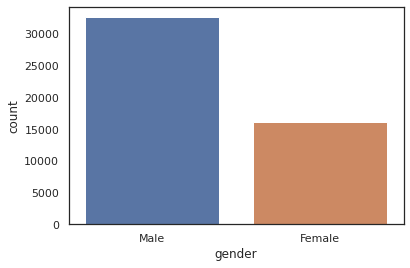

In [ ]:
sns.countplot(x="gender", data=dataset)

In [ ]:
dataset.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

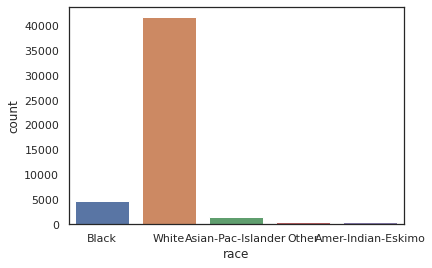

In [ ]:
sns.countplot(x="race", data=dataset)

In [ ]:
#Reformating the target varaible (Dependent variaabel)
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(4)



,age,workclass,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1


In [ ]:
#exploring the target variable target
dataset.income.value_counts()



0    37155
1    11687
Name: income, dtype: int64

We have 37155 people with incomes below 50k and 11687 with incomes above 50k


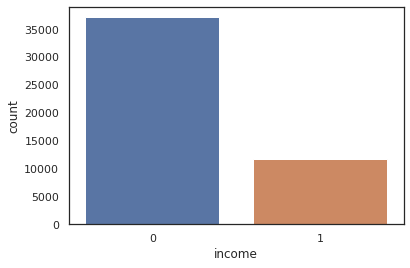

In [ ]:
sns.countplot(x="income", data=dataset)

In [ ]:

# Identify Numeric features
numeric_features = ['age','fnlwgt','educationnum','capitalgain','capitalloss','hoursperweek','income']

# Identify Categorical features
cat_features = ['workclass','education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry']



Analyzing numerical features

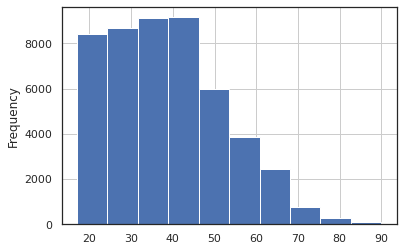

In [ ]:
#Age
dataset.age.plot.hist(grid=True)



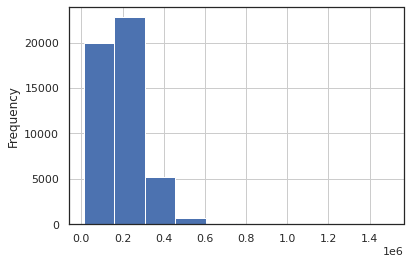

In [ ]:
dataset.fnlwgt.plot.hist(grid=True)

In [ ]:
#education
dataset.educationalnum.value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educationalnum, dtype: int64

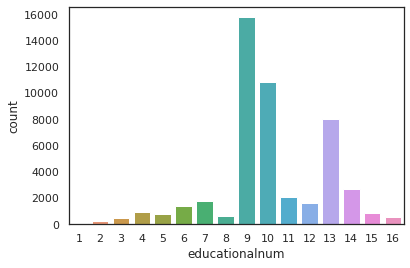

In [ ]:
sns.countplot(x="educationalnum", data=dataset)

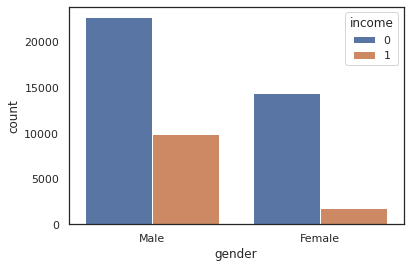

In [ ]:
#Income according to the gender
sns.countplot(x="gender", hue="income", data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


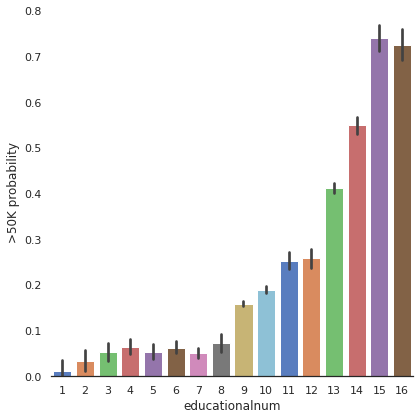

In [ ]:
#Exploring Education Num vs Income
ed_inc= sns.factorplot(x="educationalnum",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
ed_inc.despine(left=True)
ed_inc = ed_inc.set_ylabels(">50K probability")



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


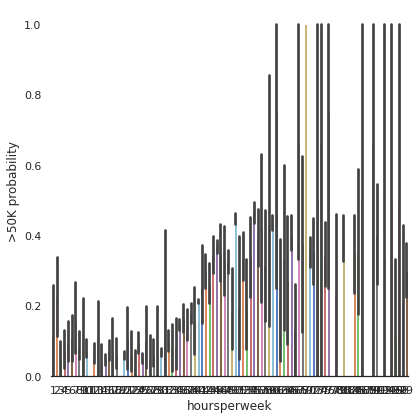

In [ ]:
#Exploring Hours Per Week vs Income
hour_inc  = sns.factorplot(x="hoursperweek",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
hour_inc.despine(left=True)
hour_inc = hour_inc.set_ylabels(">50K probability")



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


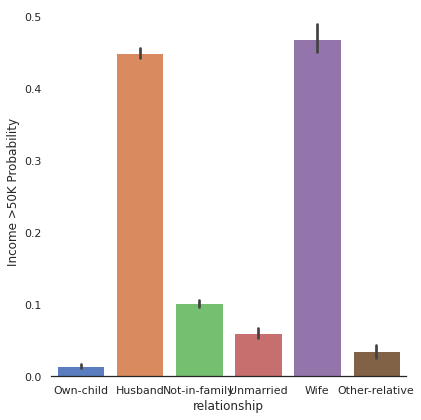

In [ ]:
#Exploring Relationship vs Income
rel_inc= sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
rel_inc.despine(left=True)
rel_inc = rel_inc.set_ylabels("Income >50K Probability")



In [ ]:
#checking for missing values
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
educationalnum    0
maritalstatus     0
occupation        0
relationship      0
race              0
gender            0
capitalgain       0
capitalloss       0
hoursperweek      0
nativecountry     0
income            0
dtype: int64

From the above, we can see that we have no missing values but there could be possibility of special characters being present. To check for those

In [ ]:
#Finding the special characters in the data frame 
dataset.isin(['?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
educationalnum       0
maritalstatus        0
occupation        2809
relationship         0
race                 0
gender               0
capitalgain          0
capitalloss          0
hoursperweek         0
nativecountry      857
income               0
dtype: int64

In [ ]:
#Feature engineering

# code will replace the special character to nan and then drop the columns 
dataset['native.country'] = dataset['nativecountry'].replace('?',np.nan)
dataset['workclass'] = dataset['workclass'].replace('?',np.nan)
dataset['occupation'] = dataset['occupation'].replace('?',np.nan)



In [ ]:
#now checking for missing values
dataset.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
educationalnum       0
maritalstatus        0
occupation        2809
relationship         0
race                 0
gender               0
capitalgain          0
capitalloss          0
hoursperweek         0
nativecountry        0
income               0
native.country     857
dtype: int64

In [ ]:
#handling the missing values
#dataset_new = dataset.copy()

#dropping the NaN rows now 
dataset.dropna(how='any',inplace=True)

print(dataset.shape)



(45222, 16)


In [ ]:
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
educationalnum    0
maritalstatus     0
occupation        0
relationship      0
race              0
gender            0
capitalgain       0
capitalloss       0
hoursperweek      0
nativecountry     0
income            0
native.country    0
dtype: int64

In [ ]:
#dropping based on uniquness of data from the dataset 
dataset.drop(['age', 'fnlwgt', 'capitalgain','capitalloss', 'native.country','educationalnum'], axis=1, inplace=True)

In [ ]:
dataset['gender'] = dataset['gender'].map({'Male': 0, 'Female': 1}).astype(int)
dataset['race'] = dataset['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
dataset['maritalstatus'] = dataset['maritalstatus'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
dataset['workclass']= dataset['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
dataset['relationship'] = dataset['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
dataset['education']= dataset['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
dataset['occupation'] = dataset['occupation'].map({ 'Farming-fishing': 0, 'Tech-support': 1, 'Adm-clerical': 2, 'Handlers-cleaners': 3, 
 'Prof-specialty': 4,'Machine-op-inspct': 5, 'Exec-managerial': 6,'Priv-house-serv': 7,'Craft-repair': 8,'Sales': 9, 'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12,'Protective-serv':13}).astype(int)

In [ ]:
dataset.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
educationalnum     int64
maritalstatus      int64
occupation         int64
relationship       int64
race               int64
gender             int64
capitalgain        int64
capitalloss        int64
hoursperweek       int64
nativecountry     object
income             int64
native.country    object
dtype: object

In [ ]:
dataset.head(10)

,age,workclass,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income,native.country
0,25,5,226802,11,7,5,5,5,0,0,0,0,40,United-States,0,United-States
1,38,5,89814,3,9,2,0,4,3,0,0,0,50,United-States,0,United-States
2,28,4,336951,9,12,2,13,4,3,0,0,0,40,United-States,1,United-States
3,44,5,160323,0,10,2,5,4,0,0,7688,0,40,United-States,1,United-States
5,34,5,198693,13,6,5,12,0,3,0,0,0,30,United-States,0,United-States
7,63,6,104626,7,15,2,4,4,3,0,3103,0,32,United-States,1,United-States
8,24,5,369667,0,10,5,12,3,3,1,0,0,40,United-States,0,United-States
9,55,5,104996,6,4,2,8,4,3,0,0,0,10,United-States,0,United-States
10,65,5,184454,3,9,2,5,4,3,0,6418,0,40,United-States,1,United-States
11,36,2,212465,12,13,2,2,4,3,0,0,0,40,United-States,0,United-States


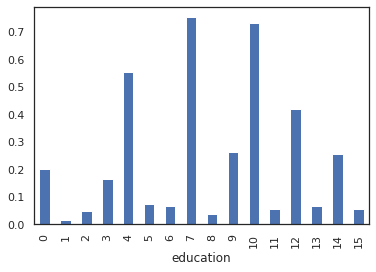

In [ ]:
#Now that we have just continuous variables we can analyze the correlation between them

#plotting a bar graph for Education against Income to see the co-relation between these columns 
dataset.groupby('education').income.mean().plot(kind='bar')



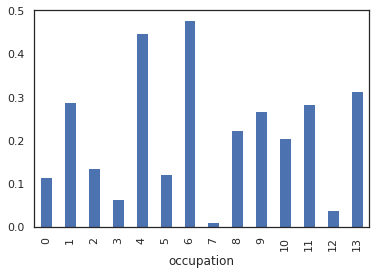

In [ ]:
#Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.

dataset.groupby('occupation').income.mean().plot(kind='bar')



In [ ]:
#Logistic Regretion
#First split the data into train and test
#Train test split
dataset.columns



Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'gender', 'hoursperweek', 'income'],
      dtype='object')

In [ ]:
X = dataset.drop('income',axis=1)
y = dataset.income

In [ ]:
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (45222, 8)
y shape :  (45222,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [ ]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("===============================")
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (30298, 8)
X_test shape :  (14924, 8)
y_train shape :  (30298,)
y_test shape :  (14924,)


In [ ]:
y_train.value_counts()

0    22782
1     7516
Name: income, dtype: int64

In [ ]:
y_test.value_counts()

0    11232
1     3692
Name: income, dtype: int64


Model Selection
Logistic Regression

Logistic Regression is one of the easiest and most commonly used supervised Machine learning algorithms for categorical classification. The basic fundamental concepts of Logistic Regression are easy to understand and can be used as a baseline algorithm for any binary (0 or 1) classification problem.


In [ ]:
log_reg = LogisticRegression()
#Train our model with the training data
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#print our price predictions on our test data
pred_log = log_reg.predict(X_test)

accuracy_log_reg = metrics.accuracy_score(y_test, pred_log)

print(f"The accuracy of the model is {round(metrics.accuracy_score(y_test,pred_log),3)*100} %")



The accuracy of the model is 77.0 %


In [ ]:
auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print(f"The AUC Score  is {round(auc_log,3)*100} %")

The AUC Score  is 80.5 %
